# Explore here

It's recommended to use this notebook for exploration purposes.

   Year_Evolution  Revenue
15           2009     0.11
14           2010     0.11
13           2011     0.20
12           2012     0.41
11           2013     2.01
10           2014     3.19
9            2015     4.04
8            2016     7.00
7            2017    11.75
6            2018    21.46
5            2019    24.57
4            2020    31.53
3            2021    53.82
2            2022    81.46
1            2023    96.77
0            2024    97.15


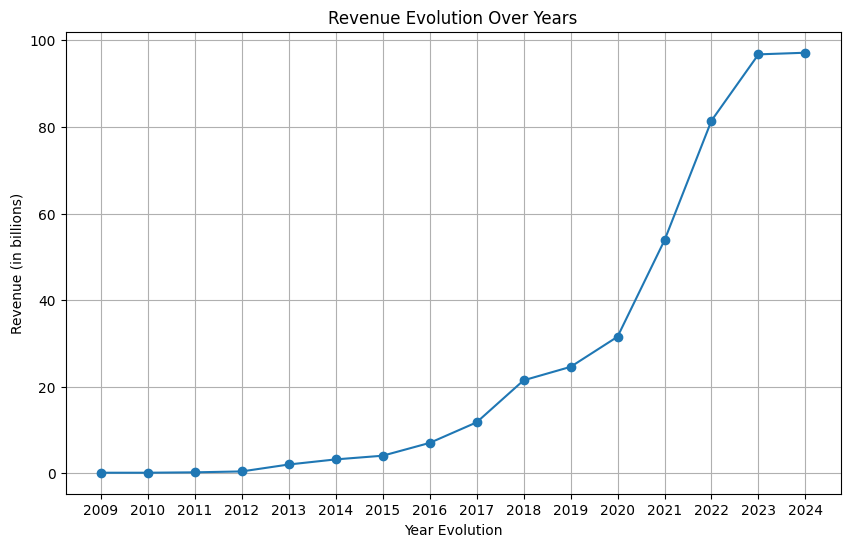

In [4]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pandas as pd

scraped_url = "https://companies-market-cap-copy.vercel.app/index.html"

response= requests.get(scraped_url)

time.sleep(10)

soup = BeautifulSoup(response.text, 'html.parser')
# print (soup)

rows = soup.find_all('tr')

evo_list = []
rev_list = []
for row in rows:
    year_evo = row.find("span", class_="year")
    # print(year_evo)
    revenue = row.find_all("td")

    if len(revenue) > 1 and year_evo:
        evo = re.search(r'\d+', year_evo.text)
        if evo:
            evo_list.append(evo.group(0))

        revenue_td = revenue[1]
        if "$" in revenue_td.text and "B" in revenue_td.text:
            rev = re.sub (r'[$B]', '', revenue_td.text)
            rev_list.append(rev.strip())

df = pd.DataFrame({
    'Year_Evolution': evo_list,
    'Revenue': rev_list               
})

df['Revenue']=df['Revenue'].astype(float)
df = df.sort_values('Year_Evolution')
print(df)

connect = sqlite3.connect('scraped_tesla.db')
cursor = connect.cursor()

cursor.execute ('''
CREATE TABLE IF NOT EXISTS ScrapedData (
    id INTEGER PRIMARY KEY,
    Year_Evolution TEXT,
    Revenue FLOAT
)
''')

connect.commit()

df.to_sql('ScrapedData', connect, if_exists='append', index=False)

connect.commit()
connect.close()

plt.figure(figsize=(10, 6))
plt.plot(df['Year_Evolution'], df['Revenue'], marker='o', linestyle='-')
plt.xlabel('Year Evolution')
plt.ylabel('Revenue (in billions)')
plt.title('Revenue Evolution Over Years')
plt.grid(True)
plt.show()
